In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.4.0


In [2]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [3]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4892 - accuracy: 0.8602 - val_loss: 0.1480 - val_accuracy: 0.9540
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1543 - accuracy: 0.9548 - val_loss: 0.1030 - val_accuracy: 0.9696
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1076 - accuracy: 0.9676 - val_loss: 0.0834 - val_accuracy: 0.9734
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0884 - accuracy: 0.9719 - val_loss: 0.0751 - val_accuracy: 0.9765
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0764 - accuracy: 0.9764 - val_loss: 0.0743 - val_accuracy: 0.9762
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0617 - accuracy: 0.9796 - val_loss: 0.0718 - val_accuracy: 0.9782
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0564 - accuracy: 0.9819 - val_loss: 0.0775 - val_accuracy:

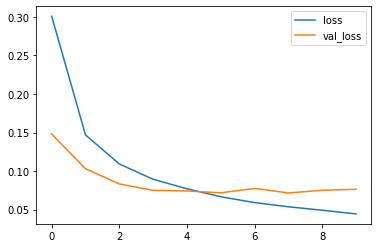

In [6]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

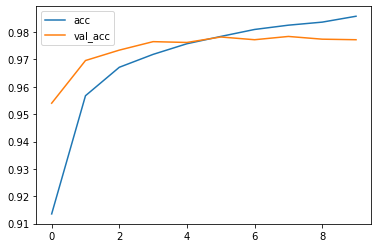

In [7]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [8]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0764 - accuracy: 0.9772
[0.07643315941095352, 0.9771999716758728]


Confusion matrix, without normalization
[[ 968    0    3    0    1    0    1    1    3    3]
 [   0 1117    6    0    0    0    3    0    9    0]
 [   5    0 1011    1    2    0    3    5    4    1]
 [   0    0    5  981    0    6    0    4    6    8]
 [   0    0    2    0  968    0    3    0    0    9]
 [   2    0    0    6    2  870    1    1    8    2]
 [   6    2    2    1   12    6  927    0    2    0]
 [   2    3   18    5    2    0    0  988    3    7]
 [   0    0    5    4    3    3    0    3  954    2]
 [   3    2    0    2    6    2    0    3    3  988]]


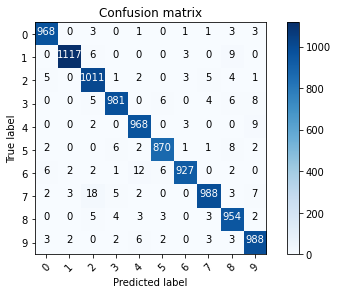

In [9]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

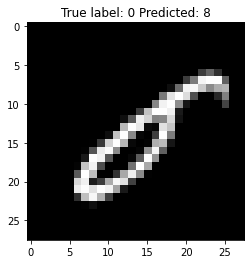

In [10]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

In [11]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [12]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
r = model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7634 - accuracy: 0.7525 - val_loss: 0.1563 - val_accuracy: 0.9559
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2427 - accuracy: 0.9346 - val_loss: 0.1165 - val_accuracy: 0.9660
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1869 - accuracy: 0.9500 - val_loss: 0.1093 - val_accuracy: 0.9671
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1534 - accuracy: 0.9573 - val_loss: 0.0977 - val_accuracy: 0.9719
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1456 - accuracy: 0.9611 - val_loss: 0.0883 - val_accuracy: 0.9751
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1338 - accuracy: 0.9634 - val_loss: 0.0856 - val_accuracy: 0.9767
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1170 - accuracy: 0.9679 - val_loss: 0.0812 - val_accuracy:

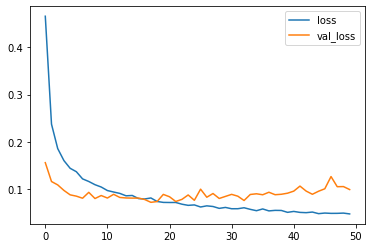

In [14]:

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

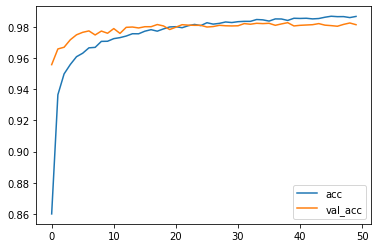

In [15]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [16]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0764 - accuracy: 0.9772
[0.07643315941095352, 0.9771999716758728]
